# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [8]:
if os.path.isfile("koalabase.csv"):
    filepath = "koalabase.csv"
    print("loading from file")

koala_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [9]:
koala_data.head()

,Call Date,Animal Record No.,Animal Name,LATITUDE,LONGITUDE,Adult Fate Other,Adult Size,Adult Gender,Adult Situation,Adult Situation Other,...,Vehicle Hit,Road Speed Limit (Km),Fall,Injury Other,Status Other,Release Date,Release Suburb,Release Post Code,Release LAT,Release LNG
0,4/07/1996,A 100485,SIGHTING,-27.182496,153.016159,NaN,Adult (More than 4kg),Unknown,In tree,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/07/1996,A 0152,SIGHTING,-27.638595,153.156763,NaN,Unknown (not recorded),Unknown,In tree,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/01/1997,NaN,SIGHTING,NaN,NaN,NaN,Adult (More than 4kg),Unknown,In tree,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/01/1997,A 2331,PHILLY,-27.544270,153.224509,NaN,Sub-Adult (2-4kg),Male,In tree,NaN,...,False,NaN,False,NaN,NaN,9/01/1997,Alexandra Hills,4161.0,NaN,NaN
4,1/01/1997,A 2324,CARRIE,-27.516611,153.223217,NaN,Sub-Adult (2-4kg),Female,In tree,NaN,...,False,NaN,False,NaN,NaN,13/01/1997,Alexandra Hills,4161.0,-27.516468,153.222832


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [10]:
date = koala_data["Call Date "].str.split("/", expand = True)
koala_data["Year"]= date[2]
koala_data



,Call Date,Animal Record No.,Animal Name,LATITUDE,LONGITUDE,Adult Fate Other,Adult Size,Adult Gender,Adult Situation,Adult Situation Other,...,Road Speed Limit (Km),Fall,Injury Other,Status Other,Release Date,Release Suburb,Release Post Code,Release LAT,Release LNG,Year
0,4/07/1996,A 100485,SIGHTING,-27.182496,153.016159,NaN,Adult (More than 4kg),Unknown,In tree,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
1,5/07/1996,A 0152,SIGHTING,-27.638595,153.156763,NaN,Unknown (not recorded),Unknown,In tree,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
2,1/01/1997,NaN,SIGHTING,NaN,NaN,NaN,Adult (More than 4kg),Unknown,In tree,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
3,1/01/1997,A 2331,PHILLY,-27.544270,153.224509,NaN,Sub-Adult (2-4kg),Male,In tree,NaN,...,NaN,False,NaN,NaN,9/01/1997,Alexandra Hills,4161.0,NaN,NaN,1997
4,1/01/1997,A 2324,CARRIE,-27.516611,153.223217,NaN,Sub-Adult (2-4kg),Female,In tree,NaN,...,NaN,False,NaN,NaN,13/01/1997,Alexandra Hills,4161.0,-27.516468,153.222832,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39901,12/02/2017,A 63676,EOA,-27.627548,152.898013,NaN,Adult (More than 4kg),NaN,In captivity,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
39902,14/02/2017,A 62438,EOA,-27.174841,152.978306,NaN,Adult (More than 4kg),NaN,In tree,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
39903,15/02/2017,A 65628,EOA,-27.437890,152.400959,NaN,Adult (More than 4kg),NaN,In captivity,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
39904,16/02/2017,A 65629,GAZZ,-27.853400,153.097809,NaN,Adult (More than 4kg),NaN,On ground,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [11]:
koala_data.columns

Index(['Call Date ', 'Animal Record No. ', 'Animal Name', 'LATITUDE',
       'LONGITUDE', 'Adult Fate Other', 'Adult Size', 'Adult Gender',
       'Adult Situation', 'Adult Situation Other', 'Young Present',
       'Adult Fate', 'Young Fate Other', 'Young Fate', 'Koala Suburb',
       'Koala Post Code', 'Koala LGA', 'Sick', 'Injured', 'Caused By Dog',
       'Orphaned', 'Under Threat', 'Dead', 'Conjunctivitis', 'Cystitis',
       'Wasted', 'Sick Other', 'Vehicle Hit', 'Road Speed Limit (Km)', 'Fall',
       'Injury Other', 'Status Other', 'Release Date', 'Release Suburb',
       'Release Post Code', 'Release LAT', 'Release LNG', 'Year'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [12]:
row_one = koala_data.iloc[1]
row_one

Call Date                             5/07/1996
Animal Record No.                        A 0152
Animal Name                            SIGHTING
LATITUDE                               -27.6386
LONGITUDE                               153.157
Adult Fate Other                            NaN
Adult Size               Unknown (not recorded)
Adult Gender                            Unknown
Adult Situation                         In tree
Adult Situation Other                       NaN
Young Present                             False
Adult Fate                                Other
Young Fate Other                            NaN
Young Fate                                Other
Koala Suburb                         Daisy Hill
Koala Post Code                            4127
Koala LGA                    Logan City Council
Sick                                      False
Injured                                   False
Caused By Dog                              True
Orphaned                                

Series objects are _very_ similar to dictionaries. They have more properties though.

2009    3496
2010    3320
2000    2939
2004    2719
2002    2517
2005    2500
2008    2487
2001    2350
2003    2294
2007    2236
2006    2207
2011    2055
1999    1944
1998    1890
1997    1862
2012    1020
2016     942
2013     520
2014     430
2015     136
2017      39
1996       2
Name: Year, dtype: int64


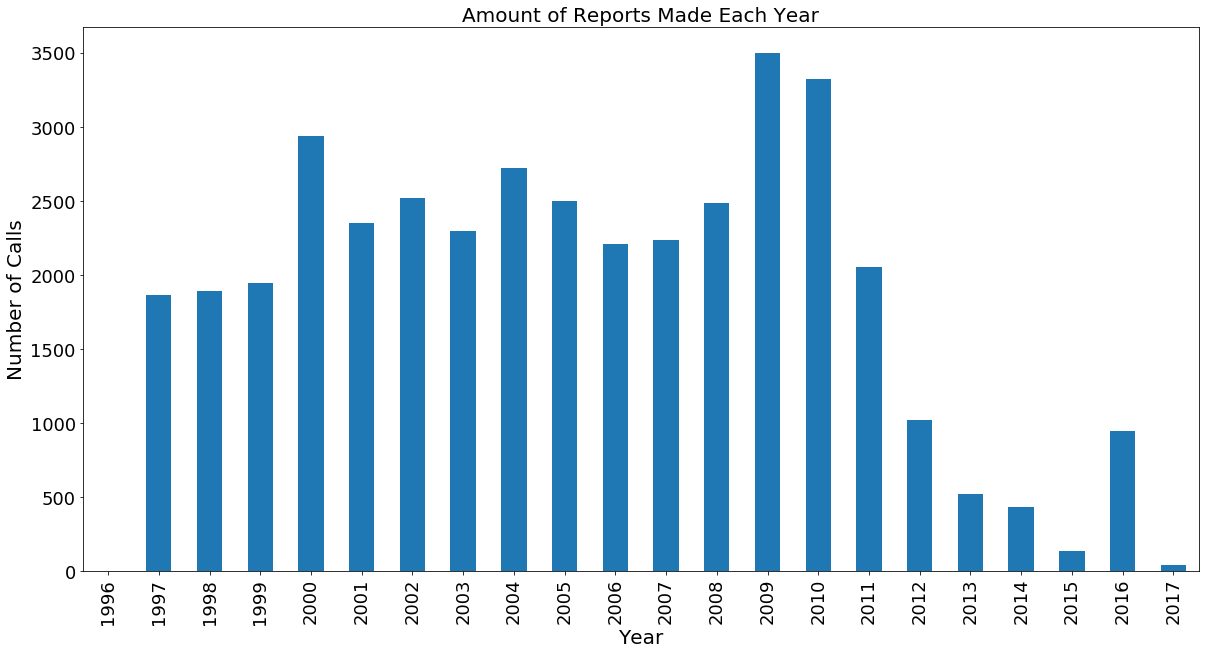

KeyboardInterrupt: 

In [13]:
print(koala_data["Year"].value_counts())

year_values=koala_data.groupby(['Year'])['Year'].count().plot(kind='bar', fontsize=18)
plt.title("Amount of Reports Made Each Year", fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Calls', fontsize=20)
plt.show()
field = "Year"
year_order = ["1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
axis = koala_data.set_index(field).loc[year_order].plot(kind="bar")
axis.set_ylabel("Value")

Male       15396
Female     14479
Unknown     9048
Name: Adult Gender, dtype: int64


Text(0.5, 1.0, 'Koala Gender')

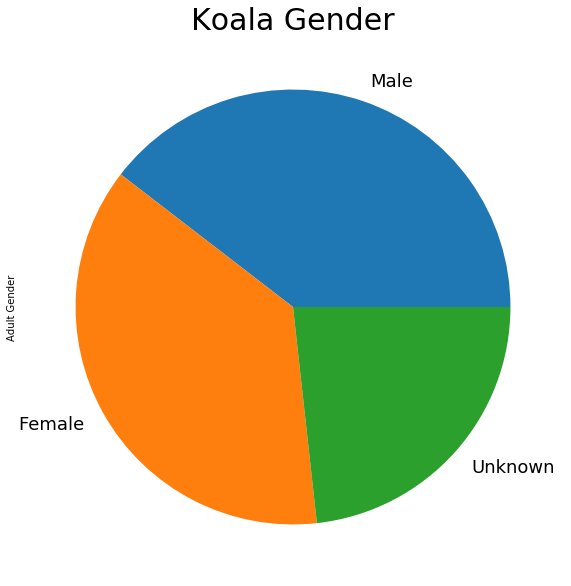

In [185]:
print(koala_data["Adult Gender"].value_counts())
koala_data["Adult Gender"].value_counts().plot(kind="pie", fontsize=18)
plt.title("Koala Gender", fontsize=30)

Joyner               514
Kurwongbah           527
Redland Bay          534
Mount Forbes         559
Strathpine           620
Springwood           625
Narangba             629
Morayfield           648
Victoria Point       655
Burpengary           667
Sheldon              739
Wellington Point     774
Birkdale             897
Bray Park            916
Lawnton             1018
Thornlands          1052
Ormiston            1106
Alexandra Hills     1205
Cleveland           1522
Kallangur           1584
Petrie              2012
Capalaba            2334
Name: Koala Suburb, dtype: int64


Text(0.5, 1.0, 'Suburbs with the Highest Koala Reports')

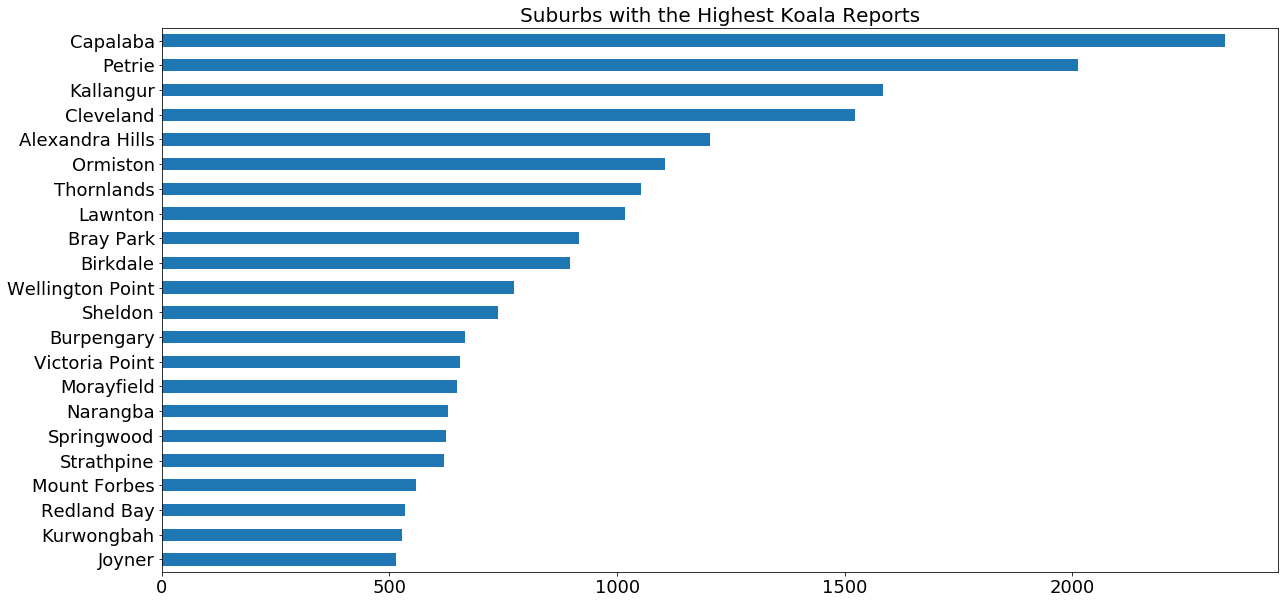

In [187]:
print(koala_data['Koala Suburb'].value_counts(ascending=True).loc[lambda x : x>500])
koala_data["Koala Suburb"].value_counts(ascending=True).loc[lambda x : x>500].plot(kind="barh", fontsize=18)
plt.title("Suburbs with the Highest Koala Reports", fontsize=20)

In [119]:

number_year = koala_data["Call Date "].value_counts()
number_year.sort_values('Call Date ',ascending=False, inplace=True)
def koalayear():
    fig, ax = plt.subplots()  

    ax.barh(width=number_year["Count"], y=number_year["Year"],height=0.8, color=ygblongg)
    y=number_year["Year"]
    plt.yticks(np.arange(min(y), max(y)+1, 1.0,), fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Koalas found by year",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('Count', fontsize=22,family = 'monospace')
    plt.ylabel('Year ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.1, str(i.get_width()), fontsize=19,\
                color=ygblong[1])
    plt.xlim(0,3000)
    plt.subplots_adjust(bottom=0)
    
    return(plt.show())

ValueError: No axis named Call Date  for object type <class 'pandas.core.series.Series'>

In [120]:
koalayear()

NameError: name 'koalayear' is not defined

In [121]:
row_one["Injured"]

False

Doing the same thing on a dataframe gives us the whole column

In [122]:
koala_data["LONGITUDE"]

0        153.016159
1        153.156763
2               NaN
3        153.224509
4        153.223217
            ...    
39901    152.898013
39902    152.978306
39903    152.400959
39904    153.097809
39905    153.141926
Name: LONGITUDE, Length: 39906, dtype: float64

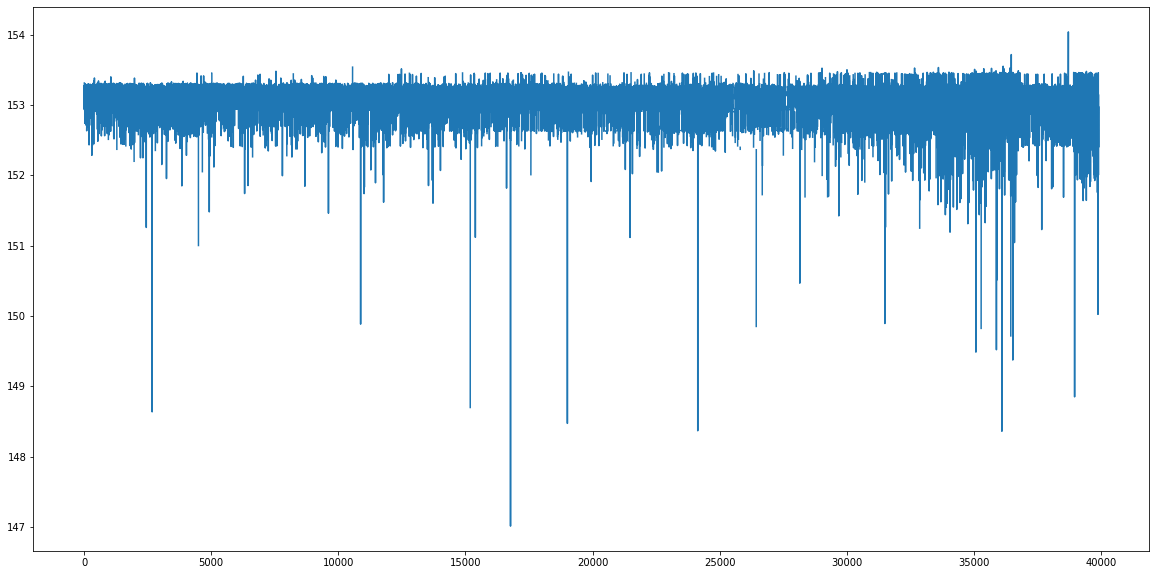

In [123]:
koala_data["LONGITUDE"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

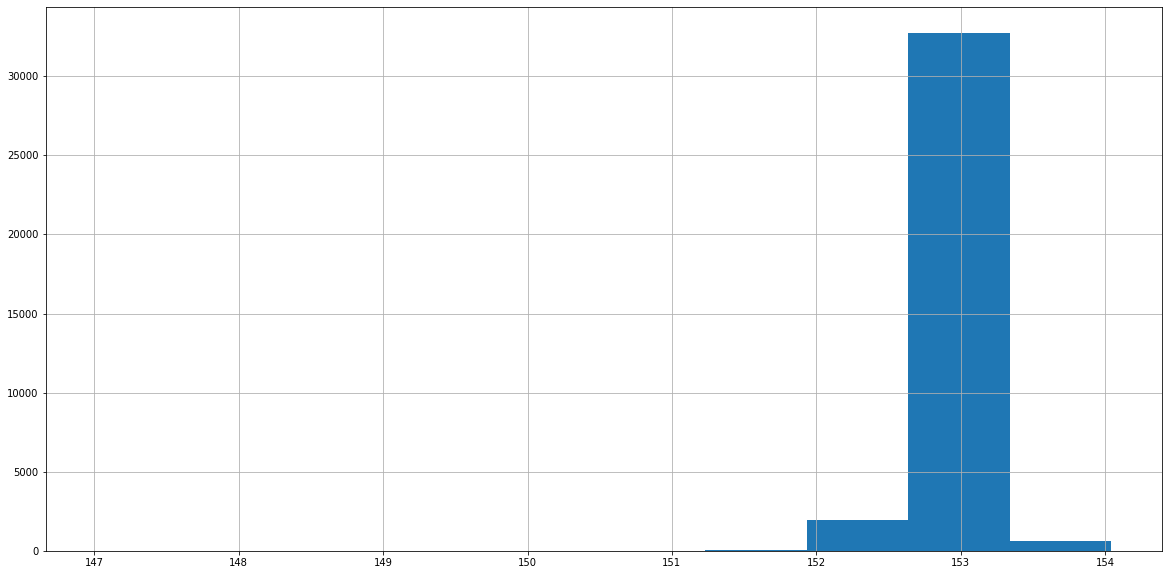

In [124]:
koala_data["LONGITUDE"].hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

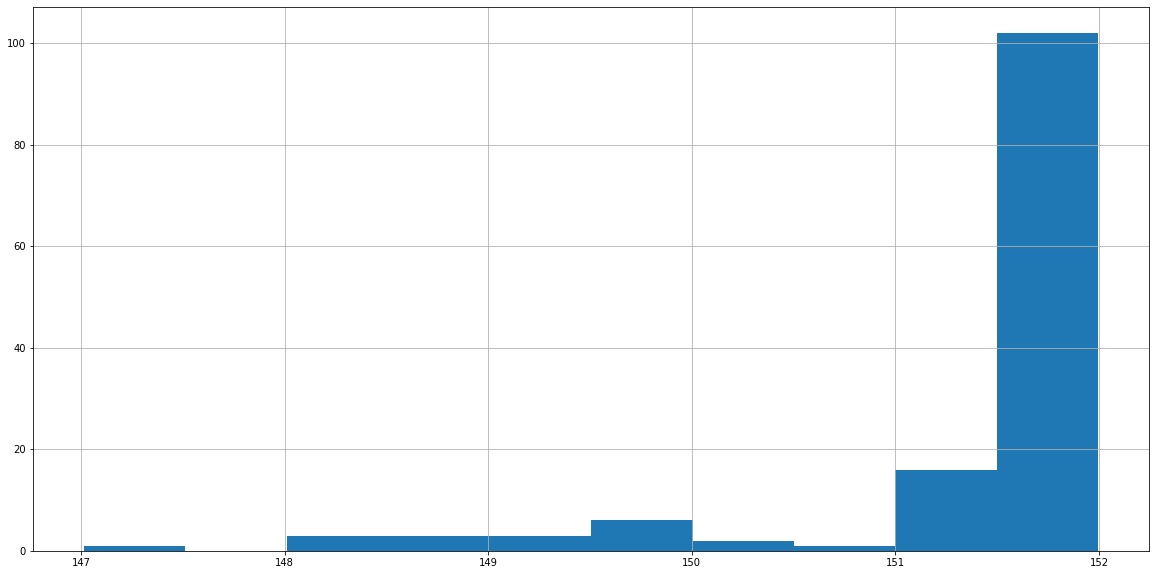

In [125]:
koala_data["LONGITUDE"][koala_data["LONGITUDE"] < 152].hist()

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [126]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [127]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [128]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0      0
1      1
2      2
3      3
98    98
99    99
dtype: int64

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [129]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",         "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca", "guineafowl",         "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal", "turkey", "Goldfish", 
        "rabbit", "Koi", "canary", "Society finch", "Fancy mouse", "Siamese fighting fish",         "Fancy rat and Lab rat", "mink", "red fox", "hedgehog", "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = ["o" in x for x in pets_series]
print(pattern_of_bools)

pets_series[pattern_of_bools]

[True, True, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False]


0                   Dog
1                  Goat
9                Donkey
11        Water buffalo
12    Western honey bee
13      dromedary camel
14                Horse
15             silkmoth
16               pigeon
17                goose
22           guineafowl
24         muscovy duck
25         Barbary dove
29             Goldfish
31                  Koi
33        Society finch
34          Fancy mouse
38              red fox
39             hedgehog
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

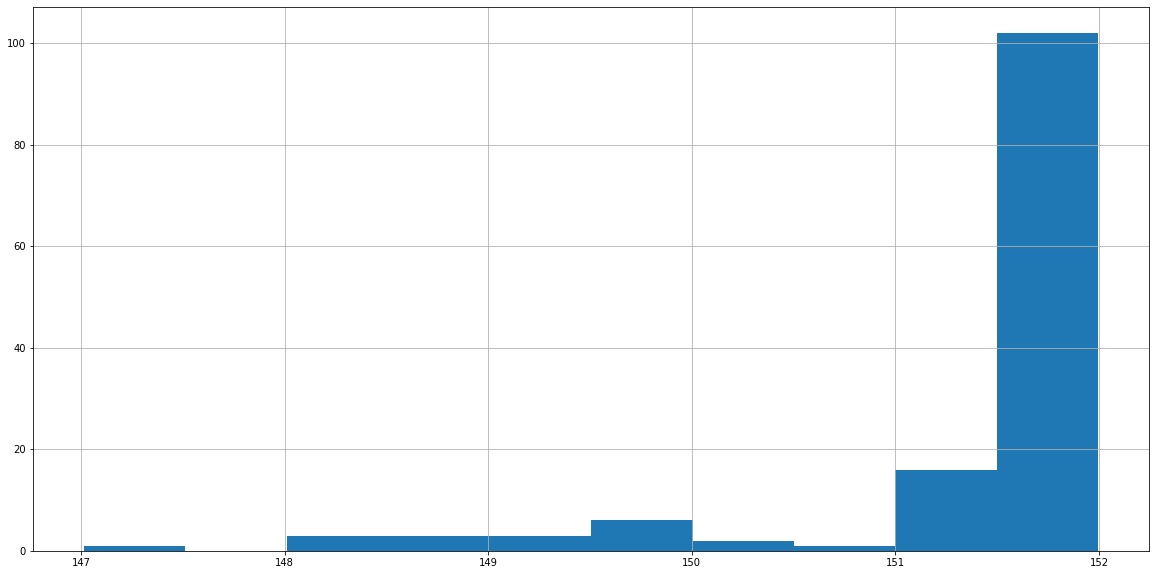

In [130]:
koala_data["LONGITUDE"][koala_data["LONGITUDE"] < 152].hist()

Let's see what's under $1000

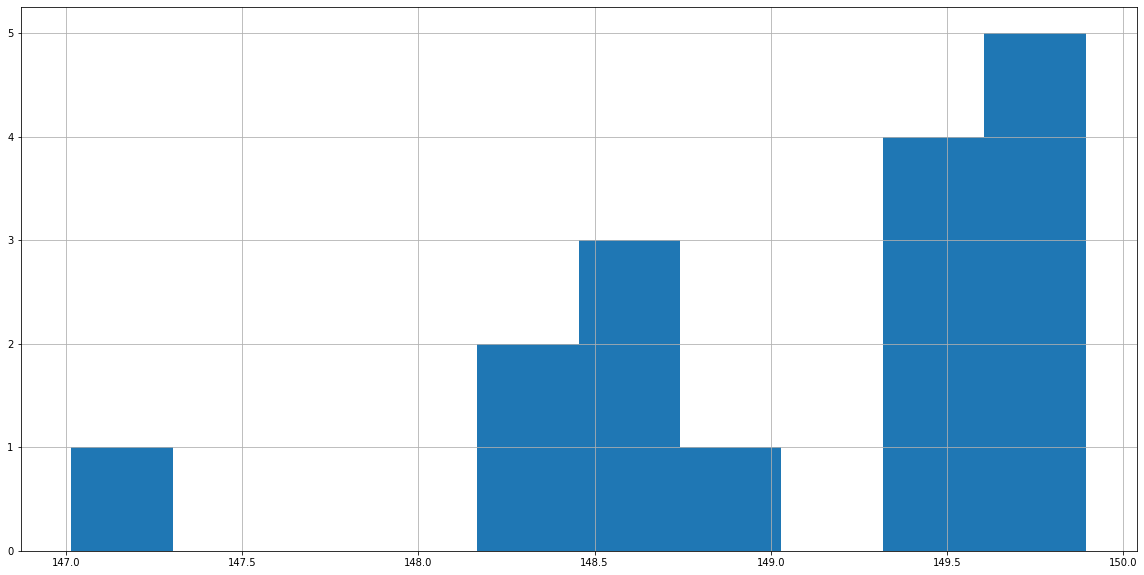

In [131]:
koala_data["LONGITUDE"][koala_data["LONGITUDE"] < 150].hist()

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [132]:
koala_data["Adult Size"].value_counts()

Adult (More than 4kg)     33179
Sub-Adult (2-4kg)          3674
Young (up to 2kg)          1963
Unknown (not recorded)     1090
Name: Adult Size, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

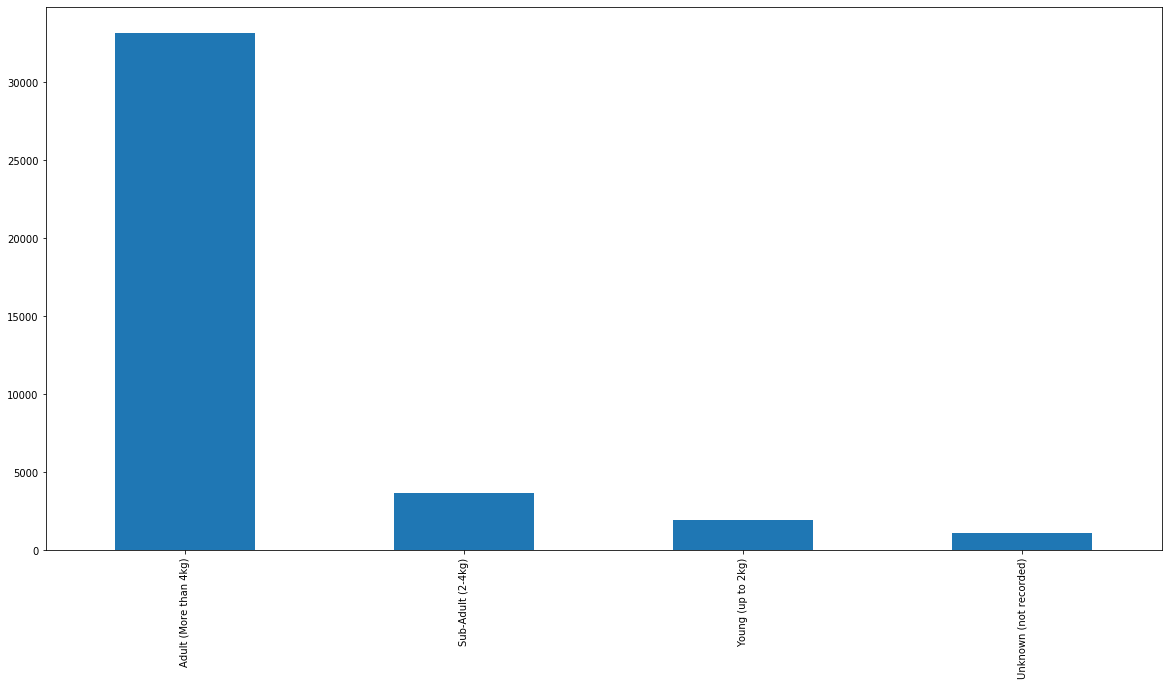

In [133]:
koala_data["Adult Size"].value_counts().plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

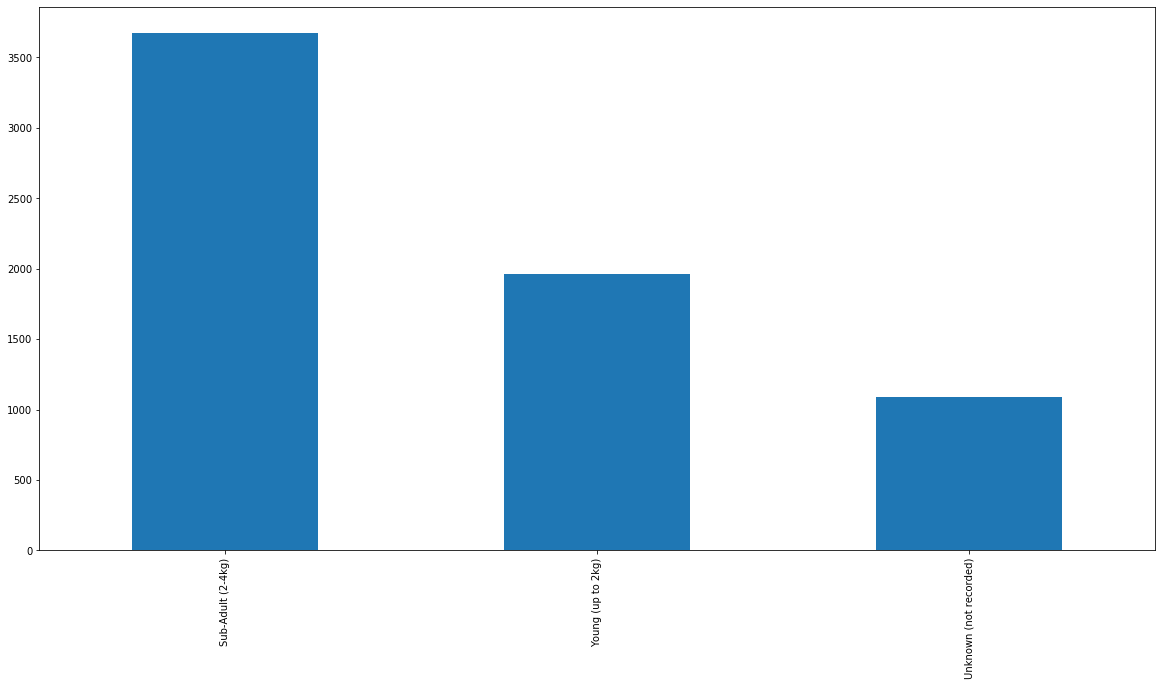

In [134]:
pdvc = koala_data["Adult Size"].value_counts()
pdvc[pdvc < 10000].plot(kind="bar")

This pattern keeps repeating itself:

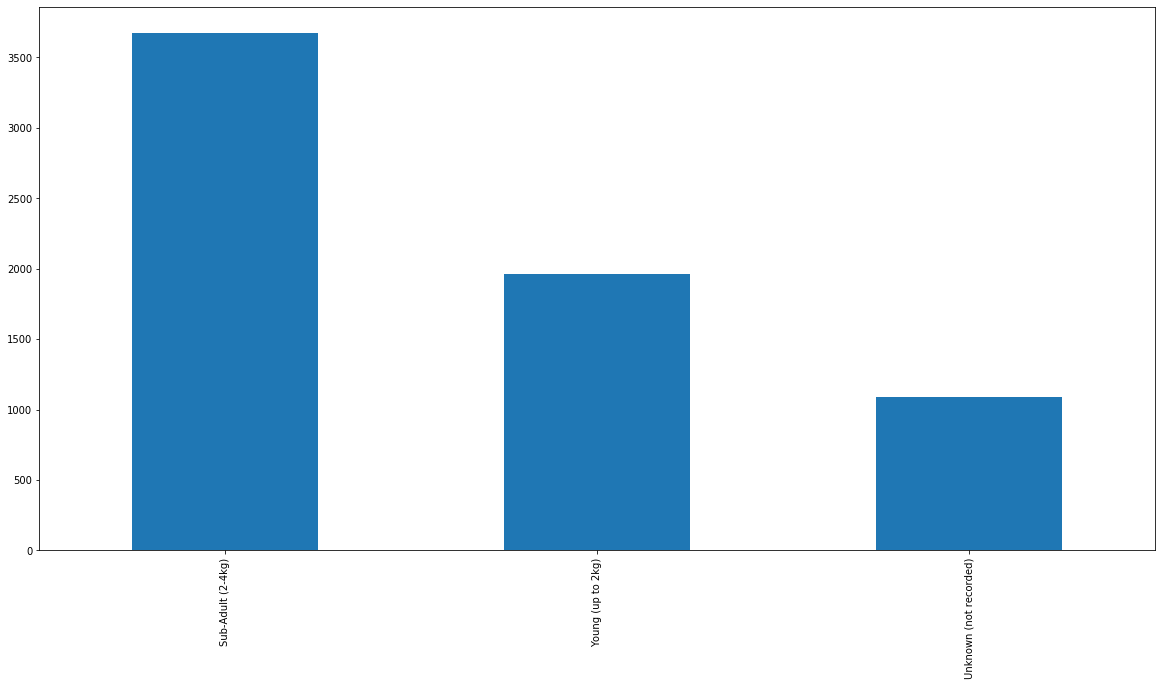

In [135]:
pdvc[pdvc < 5000].plot(kind="bar")

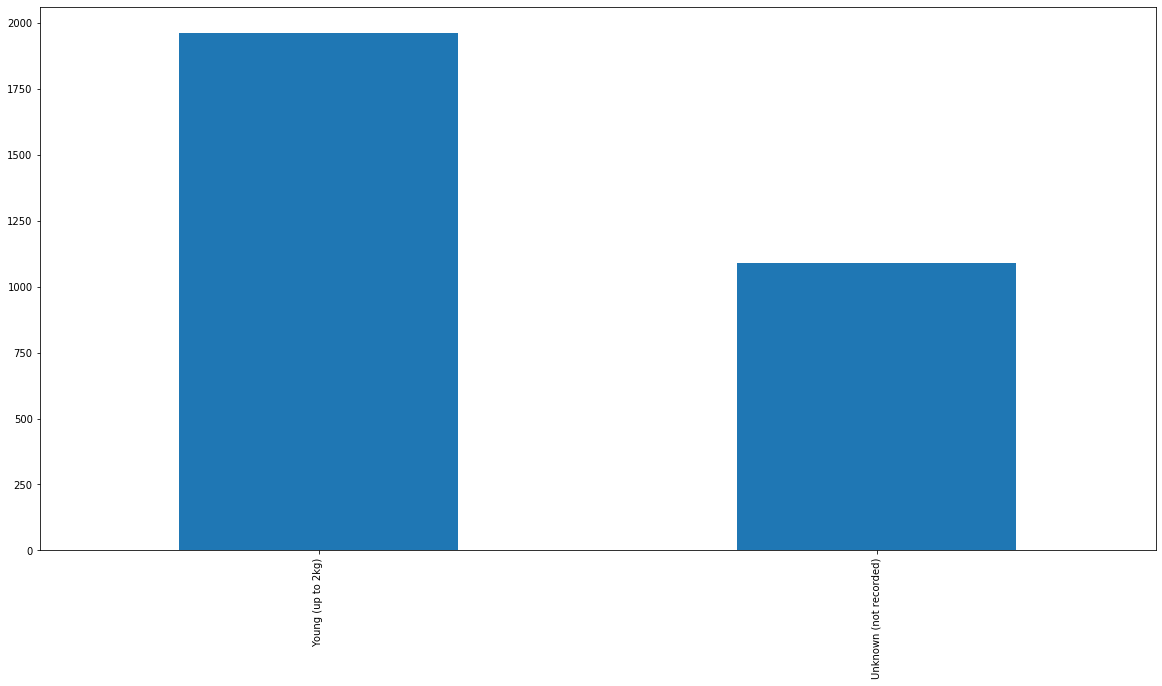

In [136]:
pdvc[pdvc < 3000].plot(kind="bar")

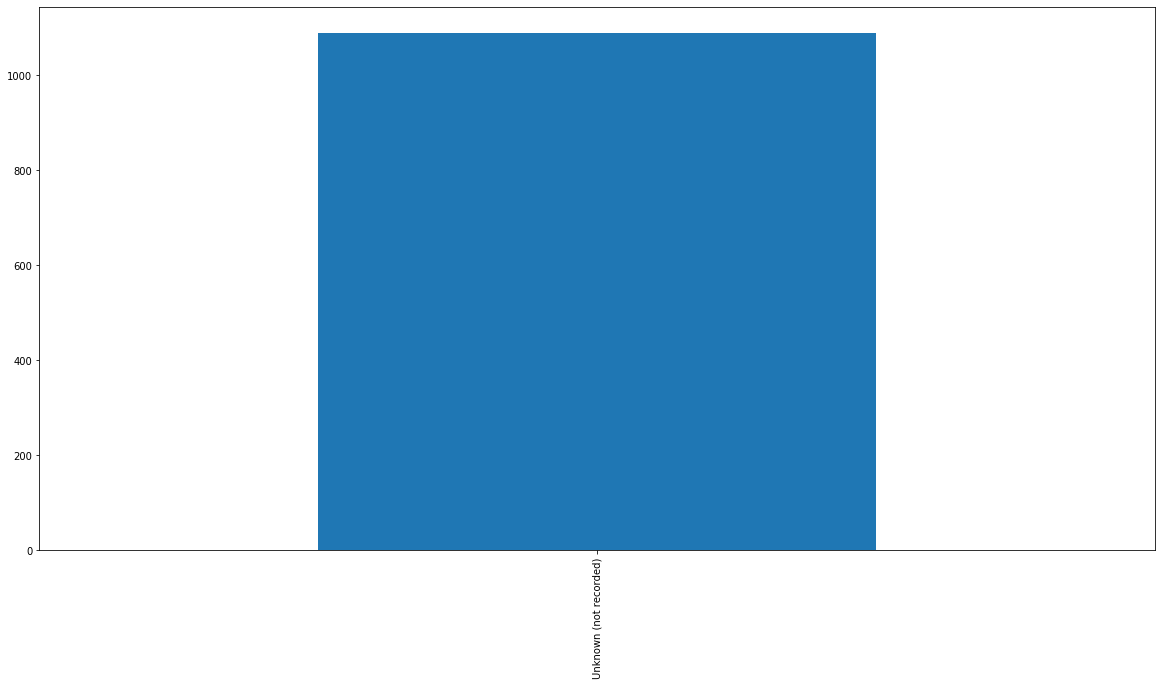

In [137]:
pdvc[pdvc < 1500].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [138]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

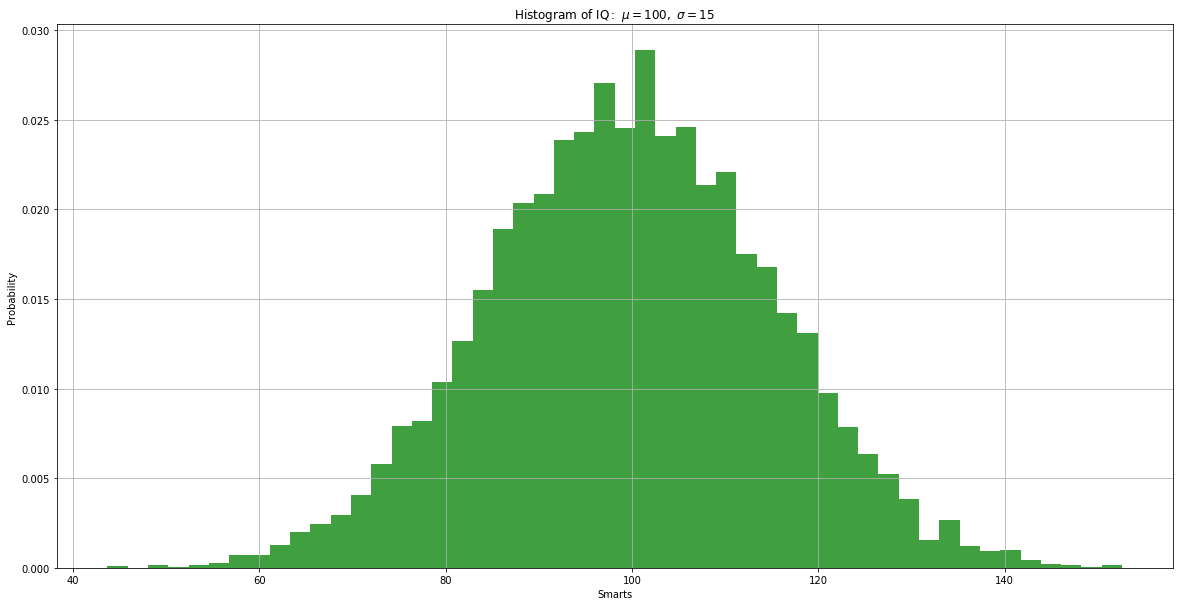

In [139]:
# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

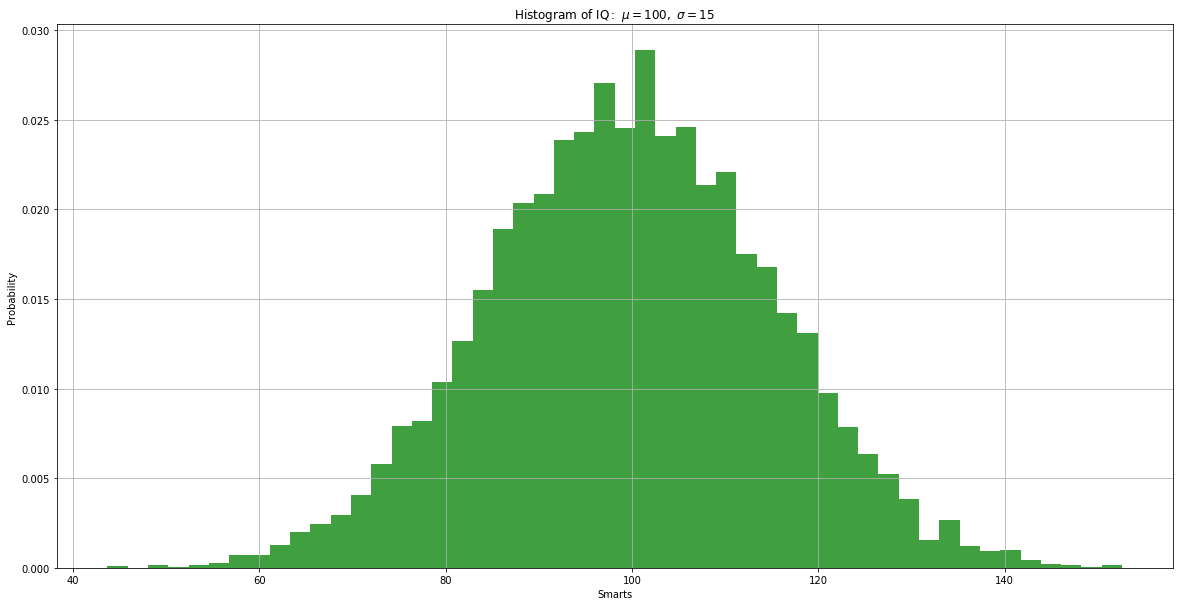

In [140]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

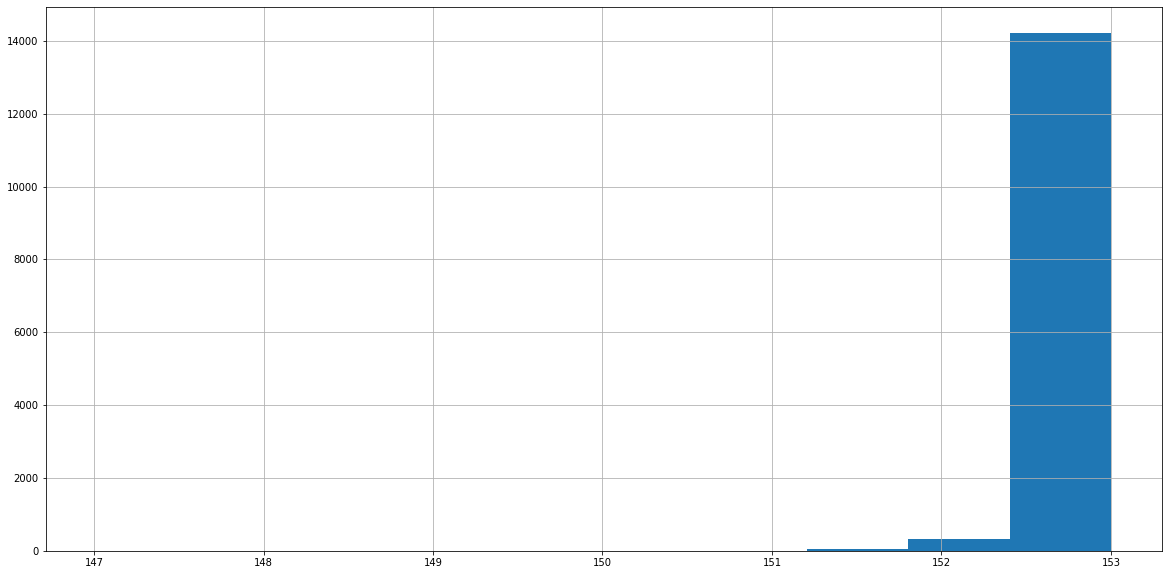

In [141]:
koala_data["LONGITUDE"][koala_data["LONGITUDE"] < 153].hist()

And this is how we'd change it so that we can add more features:

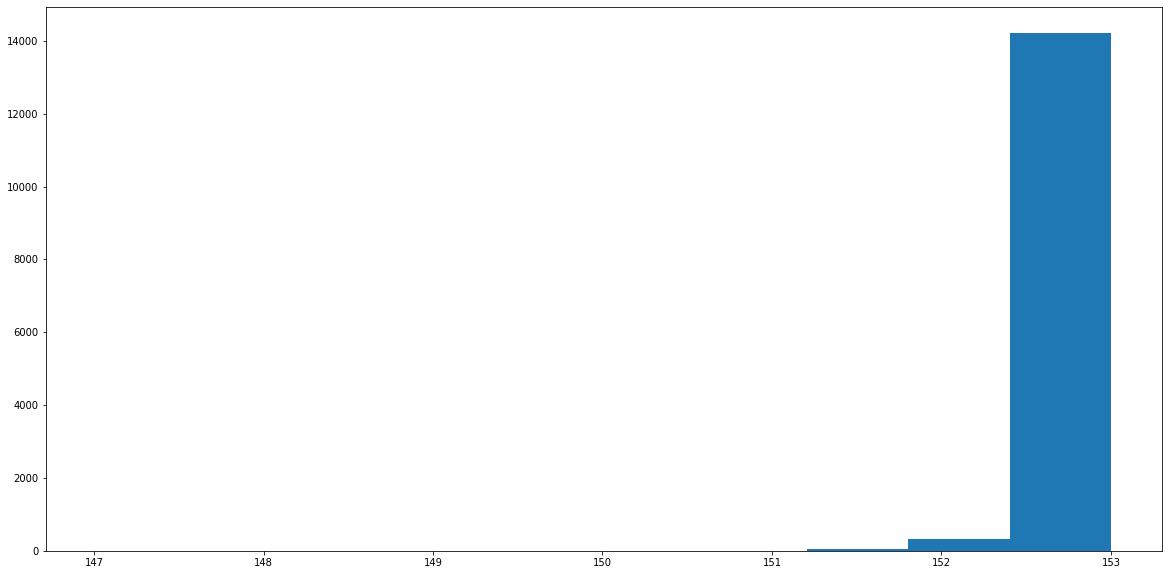

In [142]:
capped_face_value_data = koala_data["LONGITUDE"][koala_data["LONGITUDE"] < 153]

plt.hist(capped_face_value_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

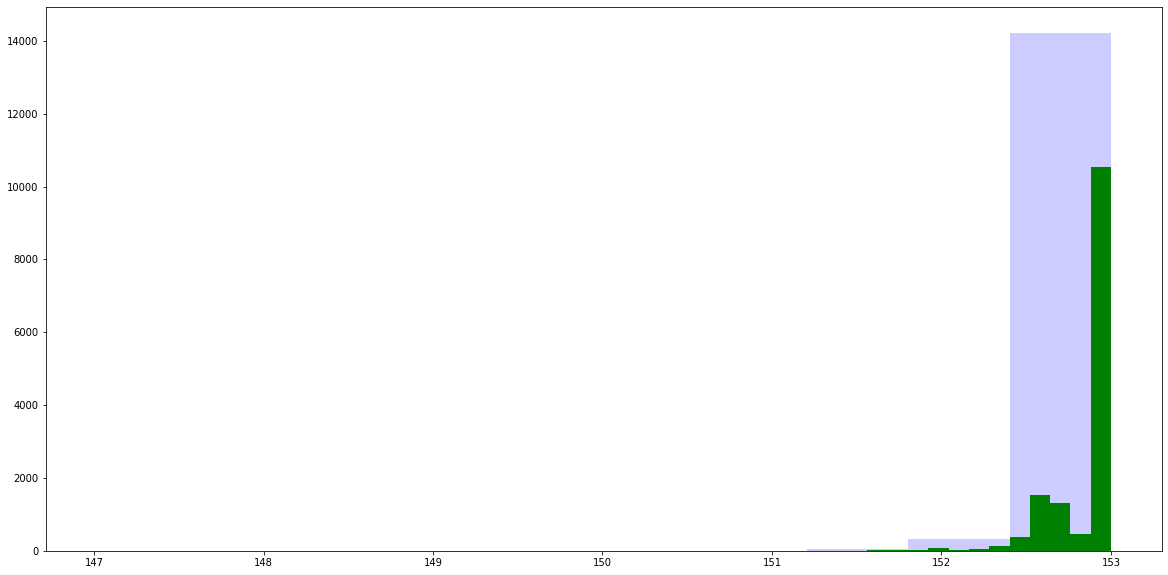

In [143]:
capped_face_value_data = koala_data["LONGITUDE"][koala_data["LONGITUDE"] < 153]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

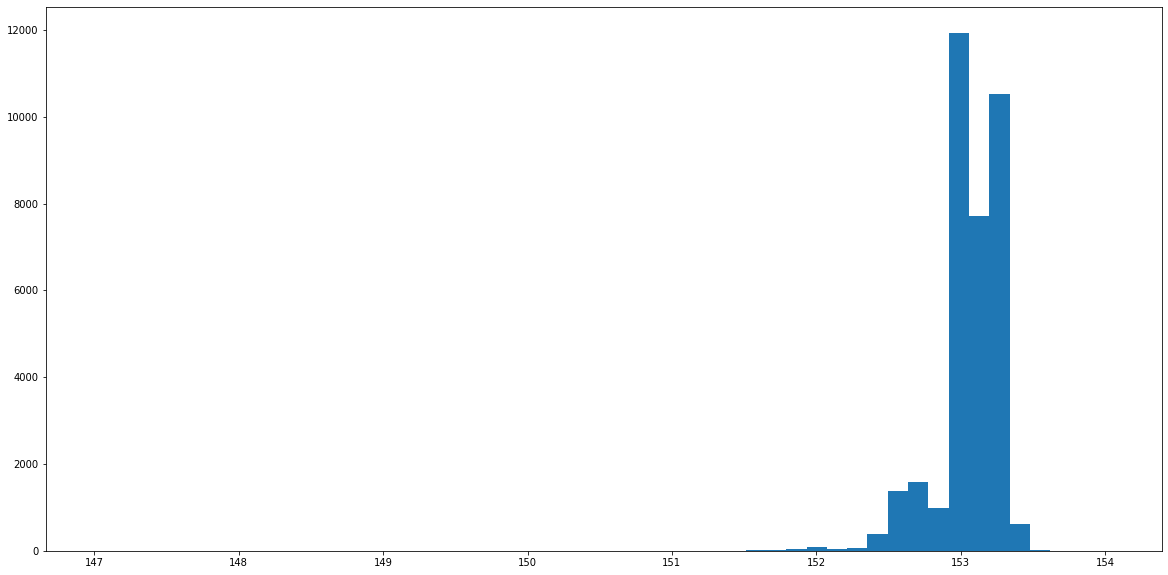

In [144]:
plt.hist(koala_data["LONGITUDE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

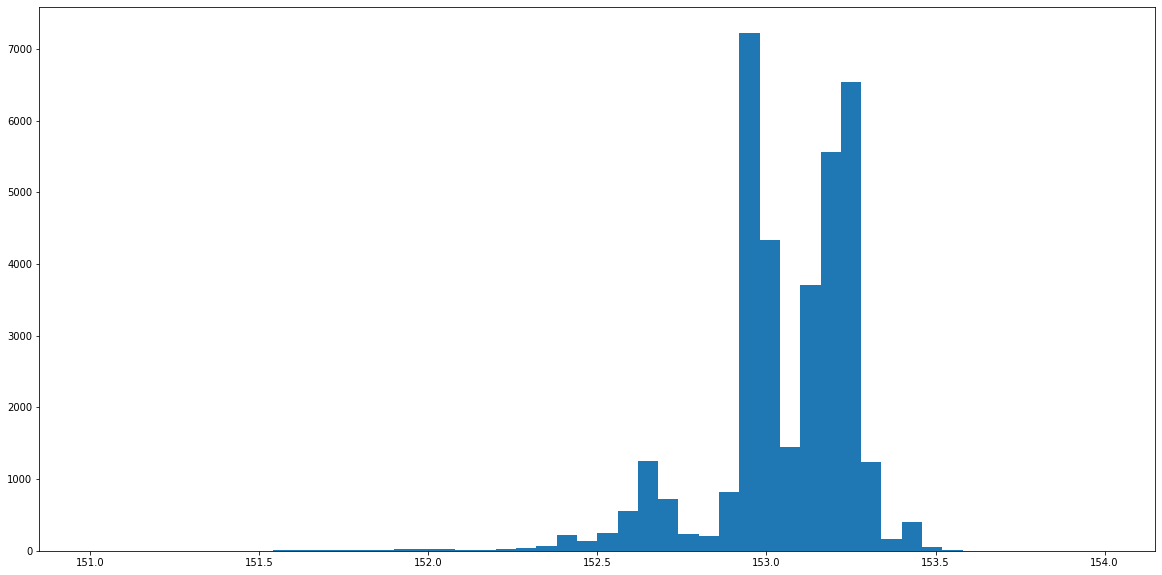

In [145]:
plt.hist(koala_data["LONGITUDE"], bins=50, range=(151, 154))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

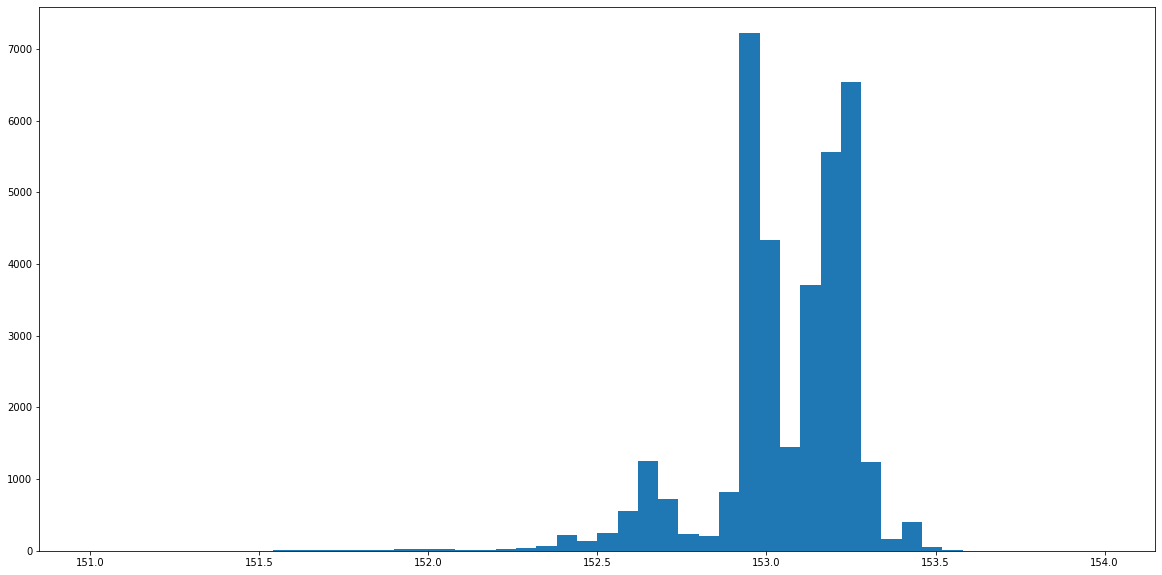

In [146]:
number_of_bins = 50
lower_bound = 151
upper_bound = 154
plt.hist(koala_data["LONGITUDE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

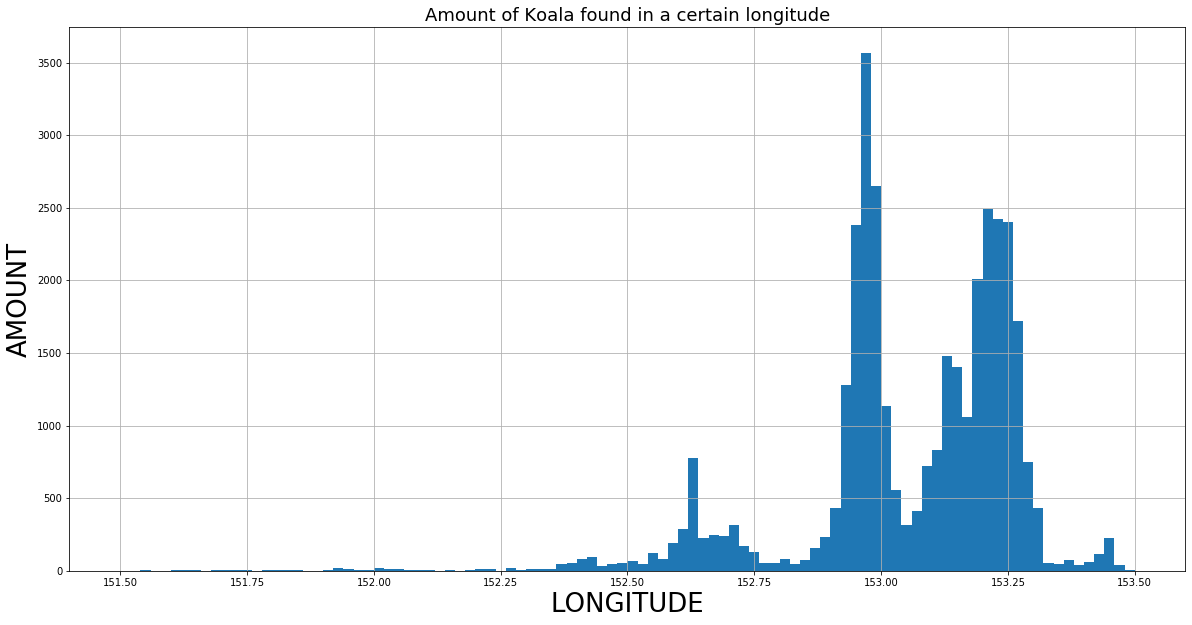

In [147]:
number_of_bins = 100
lower_bound = 151.5
upper_bound = 153.5

plt.hist(koala_data["LONGITUDE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Amount of Koala found in a certain longitude", fontsize=18)
plt.xlabel('LONGITUDE', fontsize=26)
plt.ylabel('AMOUNT', fontsize=26)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [148]:
koala_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['Call Date '],
                           dayfirst=True)
koala_data.head(2)

,Call Date,Animal Record No.,Animal Name,LATITUDE,LONGITUDE,Adult Fate Other,Adult Size,Adult Gender,Adult Situation,Adult Situation Other,...,Vehicle Hit,Road Speed Limit (Km),Fall,Injury Other,Status Other,Release Date,Release Suburb,Release Post Code,Release LAT,Release LNG
0,1996-07-04,A 100485,SIGHTING,-27.182496,153.016159,NaN,Adult (More than 4kg),Unknown,In tree,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-07-05,A 0152,SIGHTING,-27.638595,153.156763,NaN,Unknown (not recorded),Unknown,In tree,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

In [149]:
Koalas_found = koala_data[["Call Date","Adult Size"]].groupby("Call Date").sum()

plt.xkcd()
plt.plot(Koalas_found, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

KeyError: "['Call Date'] not in index"

In [150]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [151]:
ss = penalty_data.loc[:5]

NameError: name 'penalty_data' is not defined

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [152]:
ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

Above is equivalent to below, it's up to you to decide what is more readable.

In [153]:
def my_f(x):
    return x.day

ss["day"] = ss.apply(my_f, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [154]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


# _fin_